# Data Analysis Project

### Leading retailers worldwide in 2021

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
retail_df = pd.read_csv("leading_retailers_2021.csv", encoding= 'latin-1')

In [3]:
retail_df.describe(include='all')

,Rank,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
count,250.000000,250,250,250,250,250,250.000000,248,248,208
unique,NaN,250,73,246,248,26,NaN,161,178,107
top,NaN,Walmart Inc,United States,"7,650","8,000",Supermarket,NaN,5.70%,3.40%,n/a
freq,NaN,1,47,2,2,52,NaN,5,4,18
mean,125.500000,NaN,NaN,NaN,NaN,NaN,11.400000,NaN,NaN,NaN
std,72.312977,NaN,NaN,NaN,NaN,NaN,22.953594,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,63.250000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,125.500000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,187.750000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN


In [4]:
retail_df.tail(1)

,Rank,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
249,250,T. J. Morris dba Home Bargains,United Kingdom,"4,478","4,478",Other specialty,1,15.80%,19.60%,9.50%


In [5]:
#we can set the rank as the index
retail_df = retail_df.set_index('Rank')
retail_df.head(1)

,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
Rank,,,,,,,,,
1,Walmart Inc,United States,"5,72,754","5,72,754",Hypermarket/ supercenter,24,3.30%,2.40%,2.40%


In [6]:
retail_df.dtypes
#seeing the current data types

Name of Company                         object
Location                                object
FY2021_retail_revenue                   object
FY2021_parent_company/ group revenue    object
Dominant_operational_format             object
Geographies_of_operation                 int64
FY2016- 2021_retail_revenueCAGR3        object
FY2020-2021_retail_revenue_growth       object
FY2021_Net_profit_margin                object
dtype: object

In [7]:
#removing the commas from our revenue data to enable convert to integers
retail_df['FY2021_retail_revenue'] = retail_df['FY2021_retail_revenue'].str.replace(',','',regex=False)
retail_df['FY2021_parent_company/ group revenue'] = retail_df['FY2021_parent_company/ group revenue'].str.replace(',','',regex=False)

In [8]:
#converting all columns to their correct data type
#the percentage columns will be turned to strings for now to be able to manipulate
retail_df = retail_df.astype({'Name of Company':'string', 'Location':'string', 'FY2021_retail_revenue':'int', 
                              'FY2021_parent_company/ group revenue':'int', 'Dominant_operational_format': 'string', 
                              'FY2016- 2021_retail_revenueCAGR3':'string', 'FY2020-2021_retail_revenue_growth':'string',
                             'FY2021_Net_profit_margin':'string'})

In [9]:
retail_df.head(1)

,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
Rank,,,,,,,,,
1,Walmart Inc,United States,572754,572754,Hypermarket/ supercenter,24,3.30%,2.40%,2.40%


In [10]:
#converting unknown strings to NaN 
retail_df = retail_df.replace(" n/a", np.NaN).replace("<NA>", np.NaN).replace(' n/a ', np.NaN).replace('n/a ', np.NaN).replace('1 -0.8% ', '0.20').replace('ne', np.NaN)

#converting our percentage data to equivalent float values
retail_df['FY2016- 2021_retail_revenueCAGR3'] = retail_df['FY2016- 2021_retail_revenueCAGR3'].str.rstrip("%").astype(float)/100
retail_df['FY2020-2021_retail_revenue_growth'] = retail_df['FY2020-2021_retail_revenue_growth'].str.rstrip("%").astype(float)/100
retail_df['FY2021_Net_profit_margin'] = retail_df['FY2021_Net_profit_margin'].str.rstrip("%").astype(float)/100

In [11]:
#getting an updated summary
retail_df.describe()

,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
count,250.000000,250.0000,250.000000,242.000000,248.000000,190.000000
mean,22601.924000,27203.8000,11.400000,0.075799,0.105190,0.042489
std,46612.442274,58281.8731,22.953594,0.136968,0.157099,0.060021
min,4478.000000,4478.0000,1.000000,-0.136000,-0.463000,-0.318000
25%,6393.000000,6565.2500,1.000000,0.022500,0.017000,0.017250
50%,9291.500000,10284.0000,3.000000,0.052000,0.063500,0.031000
75%,18110.000000,21940.2500,11.000000,0.093750,0.173500,0.064000
max,572754.000000,572754.0000,215.000000,1.531000,0.808000,0.346000


In [12]:
#showing we now have the correct datatypes
retail_df.dtypes

Name of Company                          string
Location                                 string
FY2021_retail_revenue                     int32
FY2021_parent_company/ group revenue      int32
Dominant_operational_format              string
Geographies_of_operation                  int64
FY2016- 2021_retail_revenueCAGR3        float64
FY2020-2021_retail_revenue_growth       float64
FY2021_Net_profit_margin                float64
dtype: object

In [13]:
#seeing that my df is in the desired format
retail_df.head(3)

,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
Rank,,,,,,,,,
1,Walmart Inc,United States,572754,572754,Hypermarket/ supercenter,24,0.033,0.024,0.024
2,"Amazon.com, Inc.",United States,239150,469822,Non-store,21,0.204,0.120,0.071
3,Costco Wholesale Corporation,United States,195929,195929,Cash & carry/ warehouse club,12,0.105,0.175,0.026


In [14]:
#now we can start making new dfs and creating some visualizations
top_5_companies = retail_df.head(5)
top_5_companies

,Name of Company,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue,Dominant_operational_format,Geographies_of_operation,FY2016- 2021_retail_revenueCAGR3,FY2020-2021_retail_revenue_growth,FY2021_Net_profit_margin
Rank,,,,,,,,,
1,Walmart Inc,United States,572754,572754,Hypermarket/ supercenter,24,0.033,0.024,0.024
2,"Amazon.com, Inc.",United States,239150,469822,Non-store,21,0.204,0.120,0.071
3,Costco Wholesale Corporation,United States,195929,195929,Cash & carry/ warehouse club,12,0.105,0.175,0.026
4,Schwarz Group,Germany,153754,156209,Discount store,33,0.078,0.055,NaN
5,"The Home Depot, Inc",United States,151157,151157,Home improvement,3,0.098,0.144,0.109


C:\Users\codyr\AppData\Local\Temp\ipykernel_28152\1669944812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_companies["FY2021_parent_company/ group revenue"] = top_5_companies["FY2021_parent_company/ group revenue"]/1000


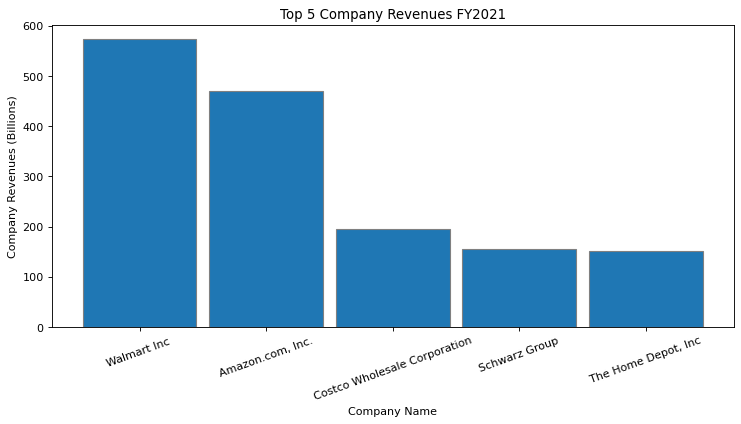

In [15]:
#let's convert our revenues ints so we can read the chart easier
top_5_companies["FY2021_parent_company/ group revenue"] = top_5_companies["FY2021_parent_company/ group revenue"]/1000

plt.figure(figsize=[11,5], dpi=80)
plt.bar(top_5_companies['Name of Company'], top_5_companies["FY2021_parent_company/ group revenue"], edgecolor="grey", width=.9)

plt.xlabel("Company Name")
plt.ylabel("Company Revenues (Billions)")
plt.title("Top 5 Company Revenues FY2021")

plt.xticks(rotation = 20)
plt.show()

In [16]:
''' doesn't really have any correlation to revenue
geo_df = retail_df[['Geographies_of_operation', 'FY2021_parent_company/ group revenue']]
geo_df = pd.DataFrame(geo_df)
geo_df = geo_df.groupby(by="Geographies_of_operation")["FY2021_parent_company/ group revenue"].sum()
geo_df = geo_df.reset_index()
geo_df = geo_df.sort_values('FY2021_parent_company/ group revenue',ascending=False)
geo_df
'''

' doesn\'t really have any correlation to revenue\ngeo_df = retail_df[[\'Geographies_of_operation\', \'FY2021_parent_company/ group revenue\']]\ngeo_df = pd.DataFrame(geo_df)\ngeo_df = geo_df.groupby(by="Geographies_of_operation")["FY2021_parent_company/ group revenue"].sum()\ngeo_df = geo_df.reset_index()\ngeo_df = geo_df.sort_values(\'FY2021_parent_company/ group revenue\',ascending=False)\ngeo_df\n'

In [17]:
#let's get a new df that shows avg revenues based on locations
loc_rev_df = retail_df[['Location', 'FY2021_retail_revenue', 'FY2021_parent_company/ group revenue']]

#removing all the duplicated united states values because of the leading and trailing spaces in the string
loc_rev_df['Location'] = loc_rev_df['Location'].str.strip()
#correcting the misspelled United States record
loc_rev_df['Location'] = loc_rev_df['Location'].str.replace('United Statese', 'United States')

#now we can successfully perform the groupby
top_avgs_loc = loc_rev_df.groupby(by="Location")["FY2021_retail_revenue","FY2021_parent_company/ group revenue"].mean()
top_avgs_loc = top_avgs_loc.reset_index().sort_values(by='FY2021_parent_company/ group revenue',ascending=False).head(5)
top_avgs_loc


C:\Users\codyr\AppData\Local\Temp\ipykernel_28152\57223701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_rev_df['Location'] = loc_rev_df['Location'].str.strip()
C:\Users\codyr\AppData\Local\Temp\ipykernel_28152\57223701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_rev_df['Location'] = loc_rev_df['Location'].str.replace('United Statese', 'United States')
C:\Users\codyr\AppData\Local\Temp\ipykernel_28152\57223701.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a

,Location,FY2021_retail_revenue,FY2021_parent_company/ group revenue
37,United States,36380.816901,46973.464789
13,Hong Kong SAR,20973.000000,44231.750000
21,Netherlands,37855.250000,38570.000000
11,Germany,33429.588235,36318.647059
10,France,28568.666667,33109.000000


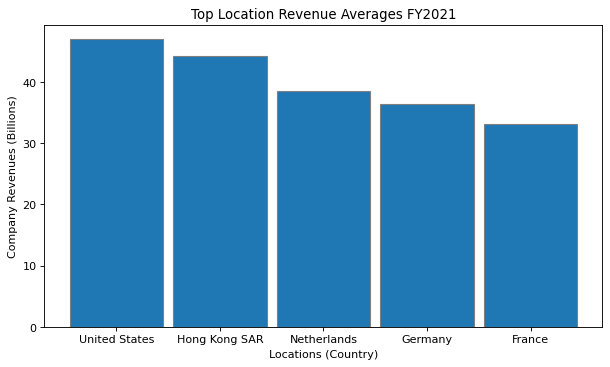

In [18]:
#now we can create our visualization

#let's convert our revenues ints so we can read the chart easier
top_avgs_loc["FY2021_parent_company/ group revenue"] = top_avgs_loc["FY2021_parent_company/ group revenue"]/1000

plt.figure(figsize=[9,5], dpi=80)
plt.bar(top_avgs_loc['Location'], top_avgs_loc["FY2021_parent_company/ group revenue"], edgecolor="grey", width=.9)

plt.xlabel("Locations (Country)")
plt.ylabel("Company Revenues (Billions)")
plt.title("Top Location Revenue Averages FY2021")

plt.show()

In [19]:
#now let's look at our revenues by the different operational format types

#let's create a new df
top_formats = retail_df[['Dominant_operational_format', 'FY2021_parent_company/ group revenue']]
top_formats = pd.DataFrame(top_formats)

#now we have to remove extra spaces and correct misspelling so our groupby function groups correctly
top_formats['Dominant_operational_format'] = top_formats['Dominant_operational_format'].str.strip().replace('Discount stor', 'Discount store')
top_formats = top_formats.groupby(by="Dominant_operational_format")["FY2021_parent_company/ group revenue"].mean()
top_formats = top_formats.reset_index()
top_formats = top_formats.sort_values(by='FY2021_parent_company/ group revenue', ascending=False)
top_formats

,Dominant_operational_format,FY2021_parent_company/ group revenue
1,Cash & carry/ warehouse club,80730.333333
10,Non-store,66843.363636
9,Hypermarket/ supercenter,47972.000000
6,Drug store/ pharmacy,44718.416667
4,Discount department store,33643.500000
8,Home improvement,31639.153846
5,Discount store,25453.500000
12,Supermarket,22081.189655
2,Convenience/ forecourt store,21938.384615
11,Other specialty,18223.564103


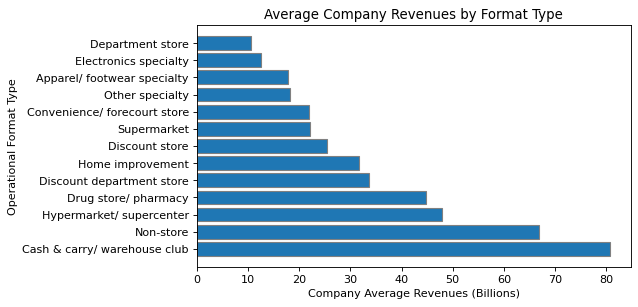

In [20]:
#let's convert our revenues ints so we can read the chart easier
top_formats['FY2021_parent_company/ group revenue'] = top_formats['FY2021_parent_company/ group revenue']/1000

#now we can plot our df
plt.figure(figsize=[7,4], dpi=80)
plt.barh(top_formats['Dominant_operational_format'], top_formats["FY2021_parent_company/ group revenue"], edgecolor="grey")

plt.xlabel("Company Average Revenues (Billions)")
plt.ylabel("Operational Format Type")
plt.title("Average Company Revenues by Format Type")

plt.show()